## Importing library to deal with data set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import IncrementalPCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df_Raw = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_Raw.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [3]:
id=list(df_test['id'])
id

[69999,
 70000,
 70001,
 70002,
 70003,
 70004,
 70005,
 70006,
 70007,
 70008,
 70009,
 70010,
 70011,
 70012,
 70013,
 70014,
 70015,
 70016,
 70017,
 70018,
 70019,
 70020,
 70021,
 70022,
 70023,
 70024,
 70025,
 70026,
 70027,
 70028,
 70029,
 70030,
 70031,
 70032,
 70033,
 70034,
 70035,
 70036,
 70037,
 70038,
 70039,
 70040,
 70041,
 70042,
 70043,
 70044,
 70045,
 70046,
 70047,
 70048,
 70049,
 70050,
 70051,
 70052,
 70053,
 70054,
 70055,
 70056,
 70057,
 70058,
 70059,
 70060,
 70061,
 70062,
 70063,
 70064,
 70065,
 70066,
 70067,
 70068,
 70069,
 70070,
 70071,
 70072,
 70073,
 70074,
 70075,
 70076,
 70077,
 70078,
 70079,
 70080,
 70081,
 70082,
 70083,
 70084,
 70085,
 70086,
 70087,
 70088,
 70089,
 70090,
 70091,
 70092,
 70093,
 70094,
 70095,
 70096,
 70097,
 70098,
 70099,
 70100,
 70101,
 70102,
 70103,
 70104,
 70105,
 70106,
 70107,
 70108,
 70109,
 70110,
 70111,
 70112,
 70113,
 70114,
 70115,
 70116,
 70117,
 70118,
 70119,
 70120,
 70121,
 70122,
 70123,


In [4]:
df_test.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,6/19/2014,7/16/2014,8/24/2014,250,0,0,NaN,NaN,Na

In [5]:
print(df_Raw.shape)
print(df_test.shape)

(69999, 172)
(30000, 171)


In [6]:
print(df_Raw.info(verbose=True,null_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    id                        69999 non-null  int64  
 1    circle_id                 69999 non-null  int64  
 2    loc_og_t2o_mou            69297 non-null  float64
 3    std_og_t2o_mou            69297 non-null  float64
 4    loc_ic_t2o_mou            69297 non-null  float64
 5    last_date_of_month_6      69999 non-null  object 
 6    last_date_of_month_7      69600 non-null  object 
 7    last_date_of_month_8      69266 non-null  object 
 8    arpu_6                    69999 non-null  float64
 9    arpu_7                    69999 non-null  float64
 10   arpu_8                    69999 non-null  float64
 11   onnet_mou_6               67231 non-null  float64
 12   onnet_mou_7               67312 non-null  float64
 13   onnet_mou_8               66296 non-null  fl

In [7]:
print(df_test.info(verbose=True,null_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 171 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    id                        30000 non-null  int64  
 1    circle_id                 30000 non-null  int64  
 2    loc_og_t2o_mou            29684 non-null  float64
 3    std_og_t2o_mou            29684 non-null  float64
 4    loc_ic_t2o_mou            29684 non-null  float64
 5    last_date_of_month_6      30000 non-null  object 
 6    last_date_of_month_7      29798 non-null  object 
 7    last_date_of_month_8      29633 non-null  object 
 8    arpu_6                    30000 non-null  float64
 9    arpu_7                    30000 non-null  float64
 10   arpu_8                    30000 non-null  float64
 11   onnet_mou_6               28831 non-null  float64
 12   onnet_mou_7               28828 non-null  float64
 13   onnet_mou_8               28325 non-null  fl

In [8]:
print(df_Raw.nunique())

id                          69999
circle_id                       1
loc_og_t2o_mou                  1
std_og_t2o_mou                  1
loc_ic_t2o_mou                  1
last_date_of_month_6            1
last_date_of_month_7            1
last_date_of_month_8            1
arpu_6                      61615
arpu_7                      61425
arpu_8                      60194
onnet_mou_6                 20057
onnet_mou_7                 20076
onnet_mou_8                 19725
offnet_mou_6                26254
offnet_mou_7                26139
offnet_mou_8                25995
roam_ic_mou_6                5306
roam_ic_mou_7                4240
roam_ic_mou_8                4252
roam_og_mou_6                6568
roam_og_mou_7                5305
roam_og_mou_8                5215
loc_og_t2t_mou_6            11491
loc_og_t2t_mou_7            11359
loc_og_t2t_mou_8            11296
loc_og_t2m_mou_6            17848
loc_og_t2m_mou_7            17641
loc_og_t2m_mou_8            17616
loc_og_t2f_mou

In [9]:
print(df_test.nunique())

id                          30000
circle_id                       1
loc_og_t2o_mou                  1
std_og_t2o_mou                  1
loc_ic_t2o_mou                  1
last_date_of_month_6            1
last_date_of_month_7            1
last_date_of_month_8            1
arpu_6                      27493
arpu_7                      27406
arpu_8                      26871
onnet_mou_6                 12283
onnet_mou_7                 12176
onnet_mou_8                 12054
offnet_mou_6                16382
offnet_mou_7                16151
offnet_mou_8                16005
roam_ic_mou_6                3072
roam_ic_mou_7                2489
roam_ic_mou_8                2523
roam_og_mou_6                3661
roam_og_mou_7                3014
roam_og_mou_8                2933
loc_og_t2t_mou_6             7707
loc_og_t2t_mou_7             7639
loc_og_t2t_mou_8             7512
loc_og_t2m_mou_6            11835
loc_og_t2m_mou_7            11761
loc_og_t2m_mou_8            11600
loc_og_t2f_mou

In [10]:
list_percentile = [.25, .5, .75,.9,0.95,.99]
df_Raw.describe(percentiles= list_percentile,include='all')

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999,69600,69266,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,68898,68765,67538,69999.000000,69999.000000

In [11]:
list_percentile = [.25, .5, .75,.9,0.95,.99]
df_test.describe(percentiles= list_percentile,include='all')

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
count,30000.000000,30000.0,29684.0,29684.0,29684.0,30000,29798,29633,30000.000000,30000.000000,30000.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.0,28828.0,28325.0,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,30000.000000,30000.000000,30000.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.0,28828.0,28325.0,28831.000000,28828.000000,28325.000000,30000.000000,30000.000000,30000.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,28831.000000,28828.000000,28325.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,29494,29467,28839,30000.000000,30000.000000,30000.000000,7585

In [12]:
for col in df_Raw.columns:
    print(col)

id
circle_id
loc_og_t2o_mou
std_og_t2o_mou
loc_ic_t2o_mou
last_date_of_month_6
last_date_of_month_7
last_date_of_month_8
arpu_6
arpu_7
arpu_8
onnet_mou_6
onnet_mou_7
onnet_mou_8
offnet_mou_6
offnet_mou_7
offnet_mou_8
roam_ic_mou_6
roam_ic_mou_7
roam_ic_mou_8
roam_og_mou_6
roam_og_mou_7
roam_og_mou_8
loc_og_t2t_mou_6
loc_og_t2t_mou_7
loc_og_t2t_mou_8
loc_og_t2m_mou_6
loc_og_t2m_mou_7
loc_og_t2m_mou_8
loc_og_t2f_mou_6
loc_og_t2f_mou_7
loc_og_t2f_mou_8
loc_og_t2c_mou_6
loc_og_t2c_mou_7
loc_og_t2c_mou_8
loc_og_mou_6
loc_og_mou_7
loc_og_mou_8
std_og_t2t_mou_6
std_og_t2t_mou_7
std_og_t2t_mou_8
std_og_t2m_mou_6
std_og_t2m_mou_7
std_og_t2m_mou_8
std_og_t2f_mou_6
std_og_t2f_mou_7
std_og_t2f_mou_8
std_og_t2c_mou_6
std_og_t2c_mou_7
std_og_t2c_mou_8
std_og_mou_6
std_og_mou_7
std_og_mou_8
isd_og_mou_6
isd_og_mou_7
isd_og_mou_8
spl_og_mou_6
spl_og_mou_7
spl_og_mou_8
og_others_6
og_others_7
og_others_8
total_og_mou_6
total_og_mou_7
total_og_mou_8
loc_ic_t2t_mou_6
loc_ic_t2t_mou_7
loc_ic_t2t_mou_8
loc

## As we can see last 3 columns of above dataset has month name as part of their name lets make it similar to other column pattern

In [13]:

df_Raw = df_Raw.rename(columns={'jun_vbc_3g': 'vbc_3g_6', 'jul_vbc_3g': 'vbc_3g_7', 'aug_vbc_3g': 'vbc_3g_8'})
#lets get all the column names
for col in df_Raw.columns:
    print(col)

id
circle_id
loc_og_t2o_mou
std_og_t2o_mou
loc_ic_t2o_mou
last_date_of_month_6
last_date_of_month_7
last_date_of_month_8
arpu_6
arpu_7
arpu_8
onnet_mou_6
onnet_mou_7
onnet_mou_8
offnet_mou_6
offnet_mou_7
offnet_mou_8
roam_ic_mou_6
roam_ic_mou_7
roam_ic_mou_8
roam_og_mou_6
roam_og_mou_7
roam_og_mou_8
loc_og_t2t_mou_6
loc_og_t2t_mou_7
loc_og_t2t_mou_8
loc_og_t2m_mou_6
loc_og_t2m_mou_7
loc_og_t2m_mou_8
loc_og_t2f_mou_6
loc_og_t2f_mou_7
loc_og_t2f_mou_8
loc_og_t2c_mou_6
loc_og_t2c_mou_7
loc_og_t2c_mou_8
loc_og_mou_6
loc_og_mou_7
loc_og_mou_8
std_og_t2t_mou_6
std_og_t2t_mou_7
std_og_t2t_mou_8
std_og_t2m_mou_6
std_og_t2m_mou_7
std_og_t2m_mou_8
std_og_t2f_mou_6
std_og_t2f_mou_7
std_og_t2f_mou_8
std_og_t2c_mou_6
std_og_t2c_mou_7
std_og_t2c_mou_8
std_og_mou_6
std_og_mou_7
std_og_mou_8
isd_og_mou_6
isd_og_mou_7
isd_og_mou_8
spl_og_mou_6
spl_og_mou_7
spl_og_mou_8
og_others_6
og_others_7
og_others_8
total_og_mou_6
total_og_mou_7
total_og_mou_8
loc_ic_t2t_mou_6
loc_ic_t2t_mou_7
loc_ic_t2t_mou_8
loc

In [14]:
df_test = df_test.rename(columns={'jun_vbc_3g': 'vbc_3g_6', 'jul_vbc_3g': 'vbc_3g_7', 'aug_vbc_3g': 'vbc_3g_8'})
#lets get all the column names
for col in df_test.columns:
    print(col)

id
circle_id
loc_og_t2o_mou
std_og_t2o_mou
loc_ic_t2o_mou
last_date_of_month_6
last_date_of_month_7
last_date_of_month_8
arpu_6
arpu_7
arpu_8
onnet_mou_6
onnet_mou_7
onnet_mou_8
offnet_mou_6
offnet_mou_7
offnet_mou_8
roam_ic_mou_6
roam_ic_mou_7
roam_ic_mou_8
roam_og_mou_6
roam_og_mou_7
roam_og_mou_8
loc_og_t2t_mou_6
loc_og_t2t_mou_7
loc_og_t2t_mou_8
loc_og_t2m_mou_6
loc_og_t2m_mou_7
loc_og_t2m_mou_8
loc_og_t2f_mou_6
loc_og_t2f_mou_7
loc_og_t2f_mou_8
loc_og_t2c_mou_6
loc_og_t2c_mou_7
loc_og_t2c_mou_8
loc_og_mou_6
loc_og_mou_7
loc_og_mou_8
std_og_t2t_mou_6
std_og_t2t_mou_7
std_og_t2t_mou_8
std_og_t2m_mou_6
std_og_t2m_mou_7
std_og_t2m_mou_8
std_og_t2f_mou_6
std_og_t2f_mou_7
std_og_t2f_mou_8
std_og_t2c_mou_6
std_og_t2c_mou_7
std_og_t2c_mou_8
std_og_mou_6
std_og_mou_7
std_og_mou_8
isd_og_mou_6
isd_og_mou_7
isd_og_mou_8
spl_og_mou_6
spl_og_mou_7
spl_og_mou_8
og_others_6
og_others_7
og_others_8
total_og_mou_6
total_og_mou_7
total_og_mou_8
loc_ic_t2t_mou_6
loc_ic_t2t_mou_7
loc_ic_t2t_mou_8
loc

In [15]:
#lets get the all null values of all columns in percentage, it would be better to look in terms of percentage
print("Total Null Values in percentage:\n")
(100*(df_Raw.isnull().sum())/len(df_Raw.index))

Total Null Values in percentage:



id                           0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.002871
std_og_t2o_mou               1.002871
loc_ic_t2o_mou               1.002871
last_date_of_month_6         0.000000
last_date_of_month_7         0.570008
last_date_of_month_8         1.047158
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
onnet_mou_6                  3.954342
onnet_mou_7                  3.838626
onnet_mou_8                  5.290076
offnet_mou_6                 3.954342
offnet_mou_7                 3.838626
offnet_mou_8                 5.290076
roam_ic_mou_6                3.954342
roam_ic_mou_7                3.838626
roam_ic_mou_8                5.290076
roam_og_mou_6                3.954342
roam_og_mou_7                3.838626
roam_og_mou_8                5.290076
loc_og_t2t_mou_6             3.954342
loc_og_t2t_mou_7             3.838626
loc_og_t2t_mou_8             5.290076
loc_og_t2m_m

In [16]:
df_Raw.shape

(69999, 172)

In [17]:
df_test.shape

(30000, 171)

In [18]:
# if recharge have null value it means we can assume recharge amount as 0 as they look important for model building
recharge_list_col = ['max_rech_data_6','max_rech_data_7','max_rech_data_8','count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8','arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_2g_6','arpu_2g_7','arpu_2g_8','night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8']
df_Raw[recharge_list_col]=df_Raw[recharge_list_col].replace(np.nan, 0)

In [22]:
# if recharge have null value it means we can assume recharge amount as 0 as they look important for model building
recharge_list_col = ['max_rech_data_6','max_rech_data_7','max_rech_data_8','count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8','arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_2g_6','arpu_2g_7','arpu_2g_8','night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8']
df_test[recharge_list_col]=df_test[recharge_list_col].replace(np.nan, 0)

In [23]:
#lets sum up all types of data recharge in the month
df_Raw['total_rech_num_data_6'] = (df_Raw['count_rech_2g_6']+df_Raw['count_rech_3g_6']).astype(int)
df_Raw['total_rech_num_data_7'] = (df_Raw['count_rech_2g_7']+df_Raw['count_rech_3g_7']).astype(int)
df_Raw['total_rech_num_data_8'] = (df_Raw['count_rech_2g_8']+df_Raw['count_rech_3g_8']).astype(int)

In [24]:
#lets calculate total amount spent on recharging data(mobile internet) in the month
#multiply amount with number of times it was recharged for data 
df_Raw['total_rech_amt_data_6'] = df_Raw['total_rech_num_data_6']*df_Raw['av_rech_amt_data_6']
df_Raw['total_rech_amt_data_7'] = df_Raw['total_rech_num_data_7']*df_Raw['av_rech_amt_data_7']
df_Raw['total_rech_amt_data_8'] = df_Raw['total_rech_num_data_8']*df_Raw['av_rech_amt_data_8']

In [25]:
#lets calculate total monthly recharge for data and call, so sum amounts spents on call and data recharge for the month.
df_Raw['total_month_rech_6'] = df_Raw['total_rech_amt_6']+df_Raw['total_rech_amt_data_6']
df_Raw['total_month_rech_7'] = df_Raw['total_rech_amt_7']+df_Raw['total_rech_amt_data_7']
df_Raw['total_month_rech_8'] = df_Raw['total_rech_amt_8']+df_Raw['total_rech_amt_data_8']

In [26]:
#lets extract high value customers based on the average recharge amount in the first two months june and july.
highvalue_cust=df_Raw[df_Raw[['total_month_rech_6','total_month_rech_7','total_month_rech_8']].mean(axis=1)> df_Raw[['total_month_rech_6','total_month_rech_7','total_month_rech_8']].mean(axis=1).quantile(0.05)]

In [27]:
highvalue_cust.drop(columns=['total_rech_num_data_6','total_rech_num_data_7','total_rech_num_data_8',
                             'total_rech_amt_data_6','total_rech_amt_data_7','total_rech_amt_data_8',
                            'total_month_rech_6','total_month_rech_7','total_month_rech_8'
                            ],inplace=True)
highvalue_cust.shape

(24816, 172)

In [28]:
df_Raw.drop(columns=['total_rech_num_data_6','total_rech_num_data_7','total_rech_num_data_8',
                             'total_rech_amt_data_6','total_rech_amt_data_7','total_rech_amt_data_8',
                            'total_month_rech_6','total_month_rech_7','total_month_rech_8'
                            ],inplace=True)
df_Raw.shape

(69999, 172)

In [29]:
df_Raw.shape

(69999, 172)

In [30]:
highvalue_cust.shape

(24816, 172)

In [31]:
df_test.shape

(30000, 171)

## There are more percentage available in most of column, so lets deal with that generic function

In [32]:
def checknullvalue(cutoff,test=False):
    if not test:
        null = (100*(highvalue_cust.isnull().sum())/len(highvalue_cust.index))
        print("{} features have more than {}% null values".format(len(null.loc[null > cutoff]),cutoff))
        return null.loc[null > cutoff]
    else:
        null = (100*(df_test.isnull().sum())/len(df_test.index))
        print("{} features have more than {}% null values".format(len(null.loc[null > cutoff]),cutoff))
        return null.loc[null > cutoff]
    
checknullvalue(43)

0 features have more than 43% null values


Series([], dtype: float64)

In [33]:
print(highvalue_cust.shape)
print(df_Raw.shape)

(24816, 172)
(69999, 172)


In [34]:
# collecting the data who have not spent any internet data incomin outgoing
col1 = ['vol_3g_mb_8', 'vol_2g_mb_8','total_ic_mou_8','total_og_mou_8']
highvalue_cust['churn']=highvalue_cust[col1].apply(lambda x: 1 if ((x['vol_3g_mb_8']==0) & (x['vol_2g_mb_8']==0.0) & (x['total_ic_mou_8']==0)  & (x['total_og_mou_8']==0)) else 0, axis=1)

In [35]:
print("Total number of customers churned is:",len(highvalue_cust[highvalue_cust['churn']==1]))
print("Total number of customers non-churned is:",len(highvalue_cust[highvalue_cust['churn']==0]))

Total number of customers churned is: 1253
Total number of customers non-churned is: 23563


In [36]:
highvalue_cust.shape

(24816, 173)

In [37]:
#Lets look into few features. Circle id and mobile number can be dropped from the list.
# circle id has only one value so drop it. mobile number has not much importance in our analysis
print(highvalue_cust.circle_id.value_counts())
highvalue_cust.drop(['circle_id'],axis=1,inplace=True)

109    24816
Name: circle_id, dtype: int64


In [38]:
#Lets look into few features. Circle id and mobile number can be dropped from the list.
# circle id has only one value so drop it. mobile number has not much importance in our analysis
print(df_test.circle_id.value_counts())
df_test.drop(['circle_id'],axis=1,inplace=True)

109    30000
Name: circle_id, dtype: int64


In [39]:
highvalue_cust.shape

(24816, 172)

In [40]:
df_test.shape

(30000, 170)

In [41]:
#lets look into all date columns and convert them into correct format
#filter column names where they have date in their name
col3 = highvalue_cust.filter(regex=('date')).columns
col3

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8'], dtype='object')

In [42]:
highvalue_cust.drop(columns=col3, inplace=True)
highvalue_cust.shape

(24816, 163)

In [43]:
df_test.drop(columns=col3, inplace=True)
df_test.shape

(30000, 161)

In [44]:
#lets get columns which have more than 0% missing values
checknullvalue(0)

96 features have more than 0% null values


loc_og_t2o_mou         1.269342
std_og_t2o_mou         1.269342
loc_ic_t2o_mou         1.269342
onnet_mou_6            4.065925
onnet_mou_7            3.803997
onnet_mou_8            5.049162
offnet_mou_6           4.065925
offnet_mou_7           3.803997
offnet_mou_8           5.049162
roam_ic_mou_6          4.065925
roam_ic_mou_7          3.803997
roam_ic_mou_8          5.049162
roam_og_mou_6          4.065925
roam_og_mou_7          3.803997
roam_og_mou_8          5.049162
loc_og_t2t_mou_6       4.065925
loc_og_t2t_mou_7       3.803997
loc_og_t2t_mou_8       5.049162
loc_og_t2m_mou_6       4.065925
loc_og_t2m_mou_7       3.803997
loc_og_t2m_mou_8       5.049162
loc_og_t2f_mou_6       4.065925
loc_og_t2f_mou_7       3.803997
loc_og_t2f_mou_8       5.049162
loc_og_t2c_mou_6       4.065925
loc_og_t2c_mou_7       3.803997
loc_og_t2c_mou_8       5.049162
loc_og_mou_6           4.065925
loc_og_mou_7           3.803997
loc_og_mou_8           5.049162
std_og_t2t_mou_6       4.065925
std_og_t

In [45]:
#lets get columns which have more than 0% missing values
checknullvalue(0,test=True)

96 features have more than 0% null values


loc_og_t2o_mou         1.053333
std_og_t2o_mou         1.053333
loc_ic_t2o_mou         1.053333
onnet_mou_6            3.896667
onnet_mou_7            3.906667
onnet_mou_8            5.583333
offnet_mou_6           3.896667
offnet_mou_7           3.906667
offnet_mou_8           5.583333
roam_ic_mou_6          3.896667
roam_ic_mou_7          3.906667
roam_ic_mou_8          5.583333
roam_og_mou_6          3.896667
roam_og_mou_7          3.906667
roam_og_mou_8          5.583333
loc_og_t2t_mou_6       3.896667
loc_og_t2t_mou_7       3.906667
loc_og_t2t_mou_8       5.583333
loc_og_t2m_mou_6       3.896667
loc_og_t2m_mou_7       3.906667
loc_og_t2m_mou_8       5.583333
loc_og_t2f_mou_6       3.896667
loc_og_t2f_mou_7       3.906667
loc_og_t2f_mou_8       5.583333
loc_og_t2c_mou_6       3.896667
loc_og_t2c_mou_7       3.906667
loc_og_t2c_mou_8       5.583333
loc_og_mou_6           3.896667
loc_og_mou_7           3.906667
loc_og_mou_8           5.583333
std_og_t2t_mou_6       3.896667
std_og_t

In [46]:
#Lets look into columns which have only values as 0 as we looked into stats thru describe
#looks like all 3 columns have only 0 and null values.
print(highvalue_cust['loc_og_t2o_mou'].unique())
print(highvalue_cust['std_og_t2o_mou'].unique())
print(highvalue_cust['loc_ic_t2o_mou'].unique())

[ 0. nan]
[ 0. nan]
[ 0. nan]


In [47]:
#Lets look into columns which have only values as 0 as we looked into stats thru describe
#looks like all 3 columns have only 0 and null values.
print(df_test['loc_og_t2o_mou'].unique())
print(df_test['std_og_t2o_mou'].unique())
print(df_test['loc_ic_t2o_mou'].unique())

[ 0. nan]
[ 0. nan]
[ 0. nan]


In [48]:
#lets drop above 3 columns from dataset
highvalue_cust.drop(['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou'],inplace=True,axis=1)

In [49]:
#lets drop above 3 columns from dataset
df_test.drop(['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou'],inplace=True,axis=1)

In [50]:
highvalue_cust.shape

(24816, 160)

In [51]:
df_test.shape

(30000, 158)

In [52]:
print(highvalue_cust['std_og_t2c_mou_6'].unique())
print(highvalue_cust['std_og_t2c_mou_7'].unique())
print(highvalue_cust['std_og_t2c_mou_8'].unique())
print(highvalue_cust['std_ic_t2o_mou_6'].unique())
print(highvalue_cust['std_ic_t2o_mou_7'].unique())
print(highvalue_cust['std_ic_t2o_mou_8'].unique())

[ 0. nan]
[ 0. nan]
[ 0. nan]
[ 0. nan]
[ 0. nan]
[ 0. nan]


In [53]:
print(df_test['std_og_t2c_mou_6'].unique())
print(df_test['std_og_t2c_mou_7'].unique())
print(df_test['std_og_t2c_mou_8'].unique())
print(df_test['std_ic_t2o_mou_6'].unique())
print(df_test['std_ic_t2o_mou_7'].unique())
print(df_test['std_ic_t2o_mou_8'].unique())

[ 0. nan]
[ 0. nan]
[ 0. nan]
[ 0. nan]
[ 0. nan]
[ 0. nan]


In [54]:
#lets drop above 4 columns from dataset
highvalue_cust.drop(['std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8'],inplace=True,axis=1)

In [55]:
#lets drop above 4 columns from dataset
df_test.drop(['std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8'],inplace=True,axis=1)

In [56]:
highvalue_cust.shape

(24816, 154)

In [57]:
df_test.shape

(30000, 152)

In [58]:
checknullvalue(1)

87 features have more than 1% null values


onnet_mou_6            4.065925
onnet_mou_7            3.803997
onnet_mou_8            5.049162
offnet_mou_6           4.065925
offnet_mou_7           3.803997
offnet_mou_8           5.049162
roam_ic_mou_6          4.065925
roam_ic_mou_7          3.803997
roam_ic_mou_8          5.049162
roam_og_mou_6          4.065925
roam_og_mou_7          3.803997
roam_og_mou_8          5.049162
loc_og_t2t_mou_6       4.065925
loc_og_t2t_mou_7       3.803997
loc_og_t2t_mou_8       5.049162
loc_og_t2m_mou_6       4.065925
loc_og_t2m_mou_7       3.803997
loc_og_t2m_mou_8       5.049162
loc_og_t2f_mou_6       4.065925
loc_og_t2f_mou_7       3.803997
loc_og_t2f_mou_8       5.049162
loc_og_t2c_mou_6       4.065925
loc_og_t2c_mou_7       3.803997
loc_og_t2c_mou_8       5.049162
loc_og_mou_6           4.065925
loc_og_mou_7           3.803997
loc_og_mou_8           5.049162
std_og_t2t_mou_6       4.065925
std_og_t2t_mou_7       3.803997
std_og_t2t_mou_8       5.049162
std_og_t2m_mou_6       4.065925
std_og_t

In [59]:
checknullvalue(1,test=True)

87 features have more than 1% null values


onnet_mou_6            3.896667
onnet_mou_7            3.906667
onnet_mou_8            5.583333
offnet_mou_6           3.896667
offnet_mou_7           3.906667
offnet_mou_8           5.583333
roam_ic_mou_6          3.896667
roam_ic_mou_7          3.906667
roam_ic_mou_8          5.583333
roam_og_mou_6          3.896667
roam_og_mou_7          3.906667
roam_og_mou_8          5.583333
loc_og_t2t_mou_6       3.896667
loc_og_t2t_mou_7       3.906667
loc_og_t2t_mou_8       5.583333
loc_og_t2m_mou_6       3.896667
loc_og_t2m_mou_7       3.906667
loc_og_t2m_mou_8       5.583333
loc_og_t2f_mou_6       3.896667
loc_og_t2f_mou_7       3.906667
loc_og_t2f_mou_8       5.583333
loc_og_t2c_mou_6       3.896667
loc_og_t2c_mou_7       3.906667
loc_og_t2c_mou_8       5.583333
loc_og_mou_6           3.896667
loc_og_mou_7           3.906667
loc_og_mou_8           5.583333
std_og_t2t_mou_6       3.896667
std_og_t2t_mou_7       3.906667
std_og_t2t_mou_8       5.583333
std_og_t2m_mou_6       3.896667
std_og_t

In [60]:
missing3 = list(checknullvalue(1).index)
missing3

87 features have more than 1% null values


['onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou

In [61]:
missing3_test = list(checknullvalue(1,test=True).index)
missing3_test

87 features have more than 1% null values


['onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou

In [62]:
missing3==missing3_test

True

In [63]:
#Lets impute all these columns with '0' as they look important for model building
highvalue_cust[missing3]=highvalue_cust[missing3].replace(np.nan, 0)

In [64]:
#Lets impute all these columns with '0' as they look important for model building
df_test[missing3]=df_test[missing3].replace(np.nan, 0)

In [65]:
checknullvalue(0)

0 features have more than 0% null values


Series([], dtype: float64)

In [66]:
checknullvalue(0,test=True)

0 features have more than 0% null values


Series([], dtype: float64)

In [67]:
highvalue_cust['av_rech_amt_data_8'].value_counts()

0.0       7017
154.0     2294
252.0     1436
198.0      843
25.0       668
          ... 
575.0        1
1137.0       1
932.0        1
528.0        1
620.0        1
Name: av_rech_amt_data_8, Length: 856, dtype: int64

In [68]:
highvalue_cust.shape

(24816, 154)

In [69]:
df_test.shape

(30000, 152)

## EDA

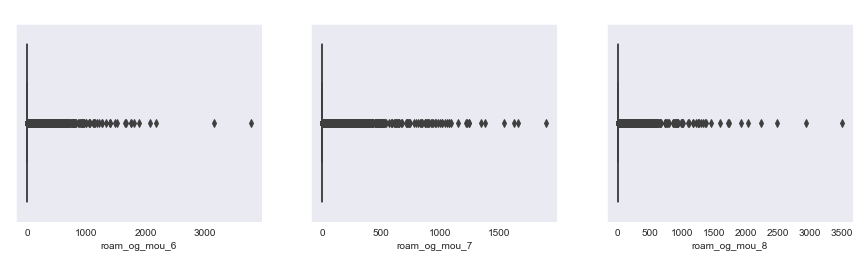

In [70]:
# Lets see distribution of same fields in each month using box plot.
# Quantitative Variables
import seaborn as sns
plt.figure(figsize=(15,8),facecolor='w')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 3, 1)
ax = sns.boxplot(highvalue_cust['roam_og_mou_6'])
ax.set_title('Outgoing roaming Usage mon-6 - Box Plot',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 3, 2)
ax = sns.boxplot(highvalue_cust['roam_og_mou_7'])
ax.set_title('Outgoing roaming Usage mon-7- Box Plot',fontsize=14,color='w')
# subplot 3
plt.subplot(2, 3, 3)
ax = sns.boxplot(highvalue_cust['roam_og_mou_8'])
ax.set_title('Outgoing roaming Usage mon-8- Box Plot',fontsize=14,color='w')
plt.show()

# Observation: 
# Distribution of roaming usage shows august month usage has reduced for sure. 
# but it should have been increased if customer is happy.

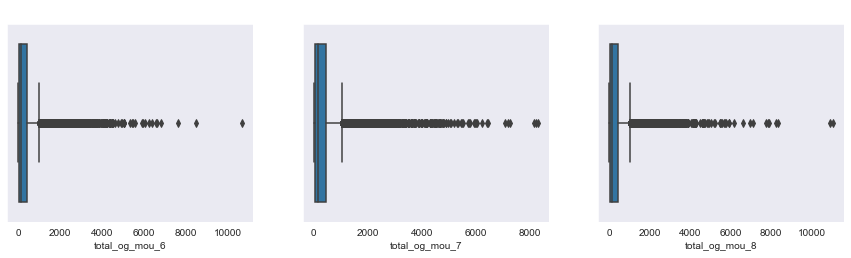

In [71]:
# Lets see distribution of same fields in each motnh using box plot.
# Quantitative Variables

plt.figure(figsize=(15,8),facecolor='w')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 3, 1)
ax = sns.boxplot(highvalue_cust['total_og_mou_6'])
ax.set_title('total Outgoing Usage mon-6 - Box Plot',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 3, 2)
ax = sns.boxplot(highvalue_cust['total_og_mou_7'])
ax.set_title('total Outgoing Usage mon-7- Box Plot',fontsize=14,color='w')
# subplot 3
plt.subplot(2, 3, 3)
ax = sns.boxplot(highvalue_cust['total_og_mou_8'])
ax.set_title('total Outgoing Usage mon-8- Box Plot',fontsize=14,color='w')
plt.show()

# Observation: 
# Distribution of total outgoing usage shows august month usage has reduced for sure. 
# but it should have been increased or constant if customer is happy but it doesn't look that way.

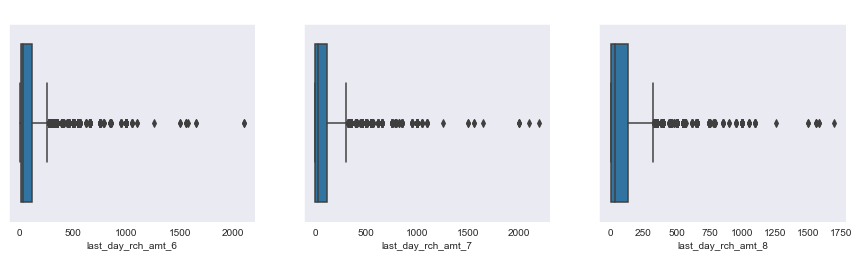

In [72]:
# Quantitative Variables

plt.figure(figsize=(15,8),facecolor='w')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 3, 1)
ax = sns.boxplot(highvalue_cust['last_day_rch_amt_6'])
ax.set_title('Last Recharge amount mon-6 - Box Plot',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 3, 2)
ax = sns.boxplot(highvalue_cust['last_day_rch_amt_7'])
ax.set_title('Last Recharge amount mon-7 - BOx Plot',fontsize=14,color='w')
# subplot 3
plt.subplot(2, 3, 3)
ax = sns.boxplot(highvalue_cust['last_day_rch_amt_8'])
ax.set_title('Last Recharge amount mon-8 - BOx Plot',fontsize=14,color='w')
plt.show()

# Observation: 
# Distribution of recharge amount in august shows customer has reduced recharge amount for sure. 
# but it should have been increased or constant if customer is happy but it doesn't look that way.

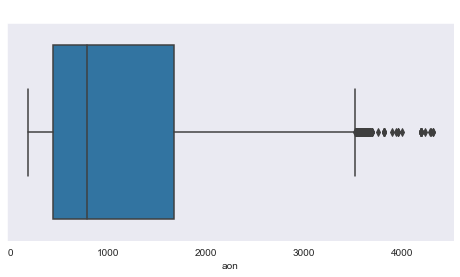

In [73]:
# Lets see distribution of same fields in each motnh using box plot.
# Quantitative Variables

plt.figure(figsize=(8,4),facecolor='w')
sns.set_style("dark")
ax = sns.boxplot(highvalue_cust['aon'])
ax.set_title('Age on Network - Box Plot',fontsize=14,color='w')
plt.show()

In [74]:
#sum of total isd MOU per month churn vs Non-Churn
highvalue_cust.groupby(['churn'])['isd_og_mou_6','isd_og_mou_7','isd_og_mou_8'].sum()

,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8
churn,,,
0,22669.76,24281.99,26388.8
1,1673.06,1258.69,0.0


In [75]:
#mean of total 3G usage per month churn vs Non-Churn
highvalue_cust.groupby(['churn'])['vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8'].mean()

,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8
churn,,,
0,341.024932,373.065509,401.352651
1,384.311556,166.260646,0.000000


In [76]:
#mean of total 2G usage per month churn vs Non-Churn
highvalue_cust.groupby(['churn'])['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8'].mean()

,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8
churn,,,
0,143.108796,146.448686,147.013953
1,162.699370,74.690471,0.000000


In [77]:
#mean of total incoming MOU per month churn vs Non-Churn
highvalue_cust.groupby(['churn'])['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8'].mean()

,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8
churn,,,
0,232.321278,240.715454,242.04018
1,167.844206,73.863192,0.00000


In [78]:
#mean of total outgoing MOU per month churn vs Non-Churn
highvalue_cust.groupby(['churn'])['total_og_mou_6','total_og_mou_7','total_og_mou_8'].mean()

,total_og_mou_6,total_og_mou_7,total_og_mou_8
churn,,,
0,330.497824,352.451427,349.52387
1,344.351780,151.257143,0.00000


In [79]:
#mean of total monthly recharge per month churn vs Non-Churn
highvalue_cust.groupby(['churn'])['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8'].mean()

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8
churn,,,
0,427.000764,441.847218,452.599245
1,443.936153,235.245810,27.138069


In [80]:
#mean of outgoing in roaming usage per month churn vs Non-Churn
highvalue_cust.groupby(['churn'])['roam_og_mou_6','roam_og_mou_7','roam_og_mou_8'].mean()

,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8
churn,,,
0,15.343666,10.243357,11.030912
1,25.331277,23.860200,15.632993


In [81]:
#mean of maximum recharge amount per month churn vs Non-Churn
highvalue_cust.groupby(['churn'])['max_rech_amt_6','max_rech_amt_7','max_rech_amt_8'].mean()

,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8
churn,,,
0,134.373127,139.233629,147.127233
1,142.909816,96.276935,13.513168


In [82]:
highvalue_cust.shape

(24816, 154)

In [83]:
df_test.shape

(30000, 152)

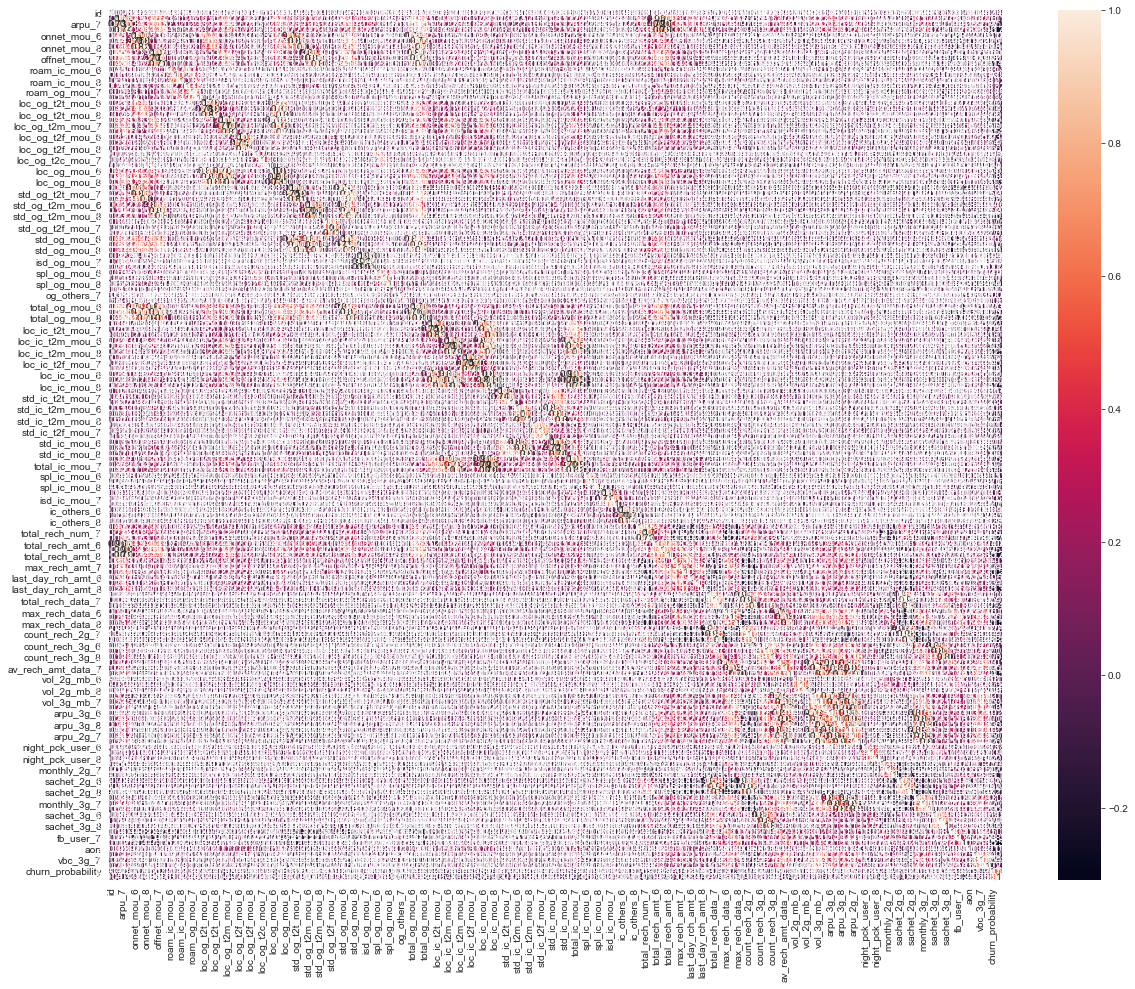

In [84]:
# Correlation of data in numeric Dataframe
plt.figure(figsize=(20,16))
sns.heatmap(highvalue_cust.corr(), annot= True)
plt.show()

# Treating outliers by log transformation

In [85]:
skewed_cols=[]
for i in highvalue_cust.columns:
    print(i,highvalue_cust[i].skew())
    if highvalue_cust[i].skew()>5 or highvalue_cust[i].skew()<-5 :
        skewed_cols.append(i)

id -0.007604181040392816
arpu_6 5.3328629421876155
arpu_7 4.979532665758571
arpu_8 5.477694269704746
onnet_mou_6 6.619692628046603
onnet_mou_7 7.212339997314182
onnet_mou_8 8.372492655885674
offnet_mou_6 5.001405243884857
offnet_mou_7 4.811462584921821
offnet_mou_8 4.8742113922482995
roam_ic_mou_6 15.667562026756395
roam_ic_mou_7 21.208642020026982
roam_ic_mou_8 25.1917141367167
roam_og_mou_6 14.693131203376277
roam_og_mou_7 11.987956573803972
roam_og_mou_8 18.483838527282682
loc_og_t2t_mou_6 12.015255811027034
loc_og_t2t_mou_7 13.112392001980052
loc_og_t2t_mou_8 18.306645454355056
loc_og_t2m_mou_6 5.591242435673333
loc_og_t2m_mou_7 4.587117497000251
loc_og_t2m_mou_8 4.350589810169255
loc_og_t2f_mou_6 10.069505853571462
loc_og_t2f_mou_7 8.986911276836402
loc_og_t2f_mou_8 8.849020639782287
loc_og_t2c_mou_6 19.336201421112918
loc_og_t2c_mou_7 21.01170835778022
loc_og_t2c_mou_8 13.577980175588957
loc_og_mou_6 6.616686835016553
loc_og_mou_7 6.044115202702081
loc_og_mou_8 7.958903786423002


In [86]:
skewed_cols

['arpu_6',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_6',
 'loc_i

In [87]:
### Using log transformation to remove skewness of data which we observed from univariate analysis and above steps 
for i in skewed_cols:
    highvalue_cust[i]=highvalue_cust[i].map(lambda x: np.log(x) if x > 0 else 0)

In [88]:
skewed_cols_again=[]
for i in highvalue_cust.columns:
    print(i,highvalue_cust[i].skew())
    if highvalue_cust[i].skew()>5 or highvalue_cust[i].skew()<-5 :
        skewed_cols_again.append(i)

id -0.007604181040392816
arpu_6 -2.206234815430563
arpu_7 4.979532665758571
arpu_8 -2.0973201527648944
onnet_mou_6 -0.12604945555424496
onnet_mou_7 -0.10888432518892188
onnet_mou_8 -0.0765231215595934
offnet_mou_6 -0.7992478546569531
offnet_mou_7 4.811462584921821
offnet_mou_8 4.8742113922482995
roam_ic_mou_6 2.4832938346088365
roam_ic_mou_7 3.081739339067368
roam_ic_mou_8 3.0781121522161423
roam_og_mou_6 2.344883798599881
roam_og_mou_7 2.909295127584478
roam_og_mou_8 2.9015279553350326
loc_og_t2t_mou_6 0.1088609413316213
loc_og_t2t_mou_7 0.09129364143587734
loc_og_t2t_mou_8 0.11181952173903684
loc_og_t2m_mou_6 -0.4789800113475004
loc_og_t2m_mou_7 4.587117497000251
loc_og_t2m_mou_8 4.350589810169255
loc_og_t2f_mou_6 1.1881038261927013
loc_og_t2f_mou_7 1.153987149204436
loc_og_t2f_mou_8 1.2338715658184722
loc_og_t2c_mou_6 1.0179035693398855
loc_og_t2c_mou_7 1.073905315555295
loc_og_t2c_mou_8 0.9015679349578947
loc_og_mou_6 -0.5932026438860234
loc_og_mou_7 -0.6083247302629861
loc_og_mou_

In [89]:
skewed_cols_again

['og_others_7',
 'og_others_8',
 'monthly_3g_7',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8']

## Perform PCA

In [90]:
hv_custcopy = highvalue_cust
print(hv_custcopy.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24816 entries, 1 to 69998
Columns: 154 entries, id to churn
dtypes: float64(132), int64(22)
memory usage: 29.3 MB
None


In [91]:
hv_custcopy.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn_probability,churn
1,1,0.000000,122.787,3.760106,0.000000,0.000000,0.000000,0.000000,25.99,30.89,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.0,3.091497,3.394173,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,3.425239,3.455054,0.000000,0.0,0.0,0.00,30.73,31.66,0.518794,2.949165,2.354228,0.343590,2.927453,2.406044,-1.049822,0.506818,1.223775,1.235471,3.674781,3.220075,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.44,3.674781,3.220475,0.0,0.0,-4.60517,0.0,0.0,0.0,0.0,0.0,0.0,3,4,5,0.000000,145,3.912023,0,145,50,0,0,0,0.0,1.0,0.0,0.0,145.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,145.0,0.0,0.000000,5.866213,0.000000,0.000000,1.376244,0.000000,0.000000,4.804595,0.0,0.000000,4.804677,0.000000,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0,710,0.000000,0.000000,0.000000,0,0
4,4,5.483585,128.191,4.620699,3.057768,1.574846,1.813195,4.042876,38.11,9.63,3.982295,0.0,0.0,2.755570,0.0,0.0,2.318458,1.574846,1.813195,3.603866,19.88,4.61,2.484073,0.207014,1.611436,0.0,2.287471,0.000000,4.076011,3.255786,2.757475,0.0,0.0,0.0,1.470176,0.000000,0.000000,0.0,0.0,0.00000,1.470176,0.000000,0.000000,0.0,0.0,0.0,0.000000,2.833213,0.000000,0.000000,0.0,0.0,63.26,42.94,15.76,1.693779,0.329304,0.978326,2.358965,1.465568,2.969902,1.706565,1.289233,1.814825,3.069912,2.236445,3.343215,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.54,2.236445,3.343215,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,13,10,8,5.669881,136,4.804021,50,41,30,25,10,30,7.0,7.0,6.0,25.0,41.0,25.0,7.0,6.0,6.0,0.0,0.0,0.0,175.0,191.0,142.0,5.968196,5.732985,5.363496,0.000000,0.000000,0.000000,0.000000,3.555348,0.0,0.000000

In [92]:
hv_custcopy.describe()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn_probability,churn
count,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.00000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.0,24816.0,24816.0,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816.000000,24816

In [93]:
hv_custcopy['churn_probability'].value_counts()

0    22840
1     1976
Name: churn_probability, dtype: int64

In [94]:
#lets import train test split 
from sklearn.model_selection import train_test_split
y = hv_custcopy['churn_probability']
X = hv_custcopy.drop(['churn',"churn_probability"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=100)

In [95]:
#perform minmax scaling before PCA
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [96]:
# fit transform the scaler on train
X_train = scaler.fit_transform(X_train)
# transform test using the already fit scaler
X_test = scaler.transform(X_test)

In [97]:
X_test.shape

(7445, 152)

In [98]:
X_train.shape

(17371, 152)

In [99]:
X_test_unseen = scaler.transform(df_test)

In [100]:
#lets print the stats before sampling
print("counts of label '1':",sum(y_train==1))
print("counts of label '0':",sum(y_train==0))

counts of label '1': 1412
counts of label '0': 15959


In [101]:
#perform oversampling using smote
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12)
X_train_smo, y_train_smo = sm.fit_resample(X_train, y_train)

In [102]:
#lets print stats after smote
print("counts of label '1':",sum(y_train_smo==1))
print("counts of label '0':",sum(y_train_smo==0))

counts of label '1': 15959
counts of label '0': 15959


In [103]:
X_train_smo.shape

(31918, 152)

In [104]:
pca = PCA( random_state=100)

In [105]:
pca.fit(X_train_smo)

PCA(random_state=100)

In [106]:
pca.explained_variance_ratio_[:50]

array([0.20231119, 0.17345171, 0.10733187, 0.0726094 , 0.05219309,
       0.04188352, 0.02904381, 0.02569435, 0.0211371 , 0.01670396,
       0.01458862, 0.01242755, 0.01121598, 0.01043873, 0.00981513,
       0.00911436, 0.00844131, 0.0081493 , 0.00718796, 0.00712041,
       0.00644714, 0.00619873, 0.00610693, 0.00532819, 0.00519723,
       0.00498429, 0.00474575, 0.00452883, 0.00421901, 0.00375654,
       0.00366421, 0.00333557, 0.00319682, 0.00311403, 0.00294682,
       0.00285946, 0.00283771, 0.00274173, 0.00262702, 0.00259414,
       0.00250337, 0.00244783, 0.00232327, 0.00219012, 0.00198662,
       0.00195772, 0.00185298, 0.00179132, 0.00174527, 0.00169291])

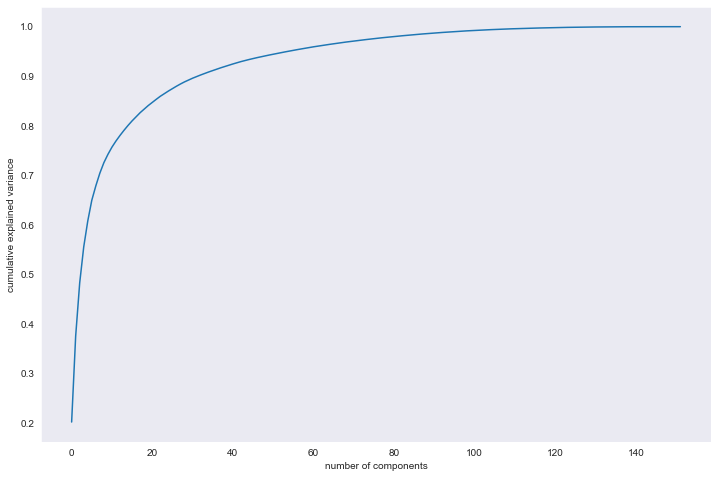

In [107]:
#lets draw screeplot in between cumulative variance and number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [108]:
#lets perform incremental PCA for efficiency 
pca_again = IncrementalPCA(n_components=80)

In [109]:
#fit
X_train_pca = pca_again.fit_transform(X_train_smo)
X_train_pca.shape

(31918, 80)

In [110]:
#lets create correlation matrix for the principal components
corrmat = np.corrcoef(X_train_pca.transpose())
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
#correlations are close to 0

max corr: 0.0041013088138908025 , min corr:  -0.004828403336244867


In [111]:
#Applying selected components to the test data - 35 components
X_test_pca = pca_again.transform(X_test)
X_test_pca.shape

(7445, 80)

In [112]:
#Applying selected components to the unseen test data - 35 components
X_test_pca_unseen = pca_again.transform(X_test_unseen)
X_test_pca_unseen.shape

(30000, 80)

# Logistic Regression

In [113]:
#import library and fit train model on train data
#class_weight="balanced":it basically means replicating the smaller class until you have as many samples as in the larger one, 
#but in an implicit way.Though we have already used smote but here we can use this too.
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
learner_pca2 = LogisticRegression(class_weight='balanced')
learner_pca2.fit(X_train_pca,y_train_smo)

LogisticRegression(class_weight='balanced')

In [114]:
#Predict on training set
dtrain_predictions = learner_pca2.predict(X_train_pca)
dtrain_predprob = learner_pca2.predict_proba(X_train_pca)[:,1]

In [115]:
#lets print some scores
print ("Accuracy :",metrics.roc_auc_score(y_train_smo, dtrain_predictions))
print ("Recall/Sensitivity :",metrics.recall_score(y_train_smo, dtrain_predictions))
print ("AUC Score (Train):",metrics.roc_auc_score(y_train_smo, dtrain_predprob))

Accuracy : 0.8525283539068865
Recall/Sensitivity : 0.8365185788583245
AUC Score (Train): 0.9240685530561406


In [116]:
#print all scores
pred_probs_test = learner_pca2.predict(X_test_pca)
confusion = metrics.confusion_matrix(y_test, pred_probs_test)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Roc_auc_score :",(metrics.roc_auc_score(y_test, pred_probs_test)))
print('precision score:',(metrics.precision_score(y_test, pred_probs_test)))
print('Sensitivity/Recall :',(TP / float(TP+FN)))
print('Specificity:',(TN / float(TN+FP)))
print('False Positive Rate:',(FP/ float(TN+FP)))
print('Positive predictive value:',(TP / float(TP+FP)))
print('Negative Predictive value:',(TN / float(TN+ FN)))
print("Accuracy :",(metrics.accuracy_score(y_test,pred_probs_test)))

Roc_auc_score : 0.8331753796300018
precision score: 0.33210332103321033
Sensitivity/Recall : 0.7978723404255319
Specificity: 0.8684784188344717
False Positive Rate: 0.13152158116552826
Positive predictive value: 0.33210332103321033
Negative Predictive value: 0.9812807881773399
Accuracy : 0.8631296171927468


In [117]:
#lets check with probability cutoff 0.5
y_train_pred = learner_pca2.predict_proba(X_train_pca)[:,1]
y_train_pred_final = pd.DataFrame({'Churn':y_train_smo, 'Churn_Prob':y_train_pred})
y_train_pred_final['Churn_Prob'] = y_train_pred
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,0,0.305461,0
1,0,0.325457,0
2,0,0.177162,0
3,0,0.014711,0
4,0,0.081645,0


In [118]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.305461,0,1,1,1,1,0,0,0,0,0,0
1,0,0.325457,0,1,1,1,1,0,0,0,0,0,0
2,0,0.177162,0,1,1,0,0,0,0,0,0,0,0
3,0,0.014711,0,1,0,0,0,0,0,0,0,0,0
4,0,0.081645,0,1,0,0,0,0,0,0,0,0,0


In [119]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.710383  0.979322  0.441444
0.2   0.2  0.793941  0.953694  0.634188
0.3   0.3  0.833010  0.919419  0.746601
0.4   0.4  0.847829  0.878313  0.817344
0.5   0.5  0.852528  0.836519  0.868538
0.6   0.6  0.846513  0.789398  0.903628
0.7   0.7  0.829783  0.728366  0.931199
0.8   0.8  0.804311  0.653424  0.955198
0.9   0.9  0.763895  0.551977  0.975813


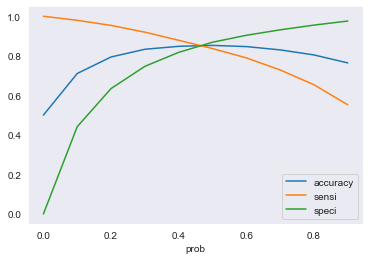

In [120]:
#lets plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [121]:
#apply cutoff probability
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.50 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.305461,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.325457,0,1,1,1,1,0,0,0,0,0,0,0
2,0,0.177162,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.014711,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.081645,0,1,0,0,0,0,0,0,0,0,0,0


In [122]:
#lets predict on test datset with optimal cutoff obtained earlier
y_test_pred = learner_pca2.predict_proba(X_test_pca)[:,1]
y_test_pred_final = pd.DataFrame({'Churn':y_test, 'Churn_Prob':y_test_pred})
y_test_pred_final['Churn_Prob'] = y_test_pred
y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.55 else 0)
y_test_pred_final.head()

,Churn,Churn_Prob,predicted
27462,0,0.021887,0
60699,0,0.213910,0
49576,0,0.014902,0
10538,0,0.170435,0
38061,0,0.187197,0


In [123]:
#lets find out all scores of test dataset
#print all scores
confusion = metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.predicted)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Roc_auc_score :",metrics.roc_auc_score(y_test_pred_final.Churn, y_test_pred_final.predicted))
print('precision score :',(metrics.precision_score(y_test_pred_final.Churn, y_test_pred_final.predicted)))
print('Sensitivity/Recall :',(TP / float(TP+FN)))
print('Specificity:',(TN / float(TN+FP)))
print('False Positive Rate:',(FP/ float(TN+FP)))
print('Positive predictive value:',(TP / float(TP+FP)))
print('Negative Predictive value:',(TN / float(TN+ FN)))

Roc_auc_score : 0.8290185947325404
precision score : 0.3613655287260616
Sensitivity/Recall : 0.7695035460992907
Specificity: 0.8885336433657899
False Positive Rate: 0.11146635663421015
Positive predictive value: 0.3613655287260616
Negative Predictive value: 0.9791800128122998


In [124]:
print("accuracy ",100*(TP+TN)/(TP+TN+FP+FN))

accuracy  87.95164539959704


## Lets apply Random forest Modeling

In [125]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(20,30,3)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')

# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score=True)
rf.fit(X_train_pca, y_train_smo)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'max_depth': range(20, 30, 3)},
             return_train_score=True, scoring='accuracy')

In [126]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,25.231032,1.045590,0.139212,0.013937,20,{'max_depth': 20},0.964286,0.960213,0.966635,0.967100,0.964750,0.964597,0.002440,4,0.991267,0.992637,0.992441,0.991893,0.991815,0.992011,0.000487
1,25.925097,0.690789,0.135810,0.006082,23,{'max_depth': 23},0.968045,0.963816,0.967732,0.969137,0.967727,0.967291,0.001813,3,0.993577,0.994282,0.994635,0.994400,0.993969,0.994173,0.000367
2,30.072946,2.636157,0.147759,0.020182,26,{'max_depth': 26},0.969612,0.964599,0.967575,0.967883,0.969920,0.967918,0.001898,2,0.994909,0.995692,0.995418,0.995261,0.995105,0.995277,0.000267
3,28.717504,0.111686,0.143102,0.003065,29,{'max_depth': 29},0.970081,0.964129,0.968358,0.972583,0.970390,0.969108,0.002829,1,0.996123,0.997102,0.996789,0.996945,0.996671,0.996726,0.000335


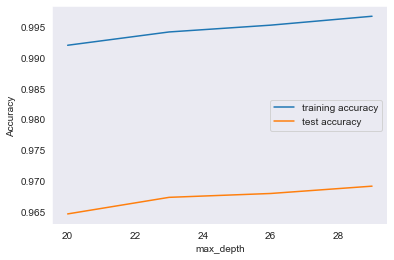

In [127]:
# plotting accuracies with max_depth
plt.figure()

plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")

plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [128]:
rf.best_params_

{'max_depth': 29}

In [129]:
rf_best=rf.best_estimator_
rf_best

RandomForestClassifier(class_weight='balanced', max_depth=29)

## Let's try to find the optimum values for n_estimators and understand how the value of n_estimators impacts the overall accuracy. Notice that we'll specify an appropriately low value of max_depth, so that the trees do not overfit.

In [130]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(80, 140, 15)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=29)

# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train_pca, y_train_smo)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=29),
             param_grid={'n_estimators': range(80, 140, 15)},
             return_train_score=True, scoring='accuracy')

In [131]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,22.776480,0.273702,0.130413,0.022141,80,{'n_estimators': 80},0.968672,0.964442,0.967888,0.968510,0.968980,0.967699,0.001667,4,0.996240,0.996828,0.996514,0.996515,0.996319,0.996483,0.000203
1,27.228862,0.345841,0.144529,0.008899,95,{'n_estimators': 95},0.969925,0.967262,0.968358,0.970703,0.969920,0.969234,0.001246,1,0.996162,0.996867,0.996279,0.996475,0.996750,0.996507,0.000268
2,31.515496,0.482512,0.154850,0.008242,110,{'n_estimators': 110},0.969768,0.966322,0.968358,0.969920,0.971173,0.969108,0.001654,3,0.996319,0.996710,0.996671,0.996515,0.996710,0.996585,0.000151
3,37.393302,1.626110,0.201415,0.022942,125,{'n_estimators': 125},0.970708,0.965695,0.968672,0.970547,0.970077,0.969140,0.001865,2,0.996123,0.996828,0.997024,0.996593,0.996789,0.996671,0.000306


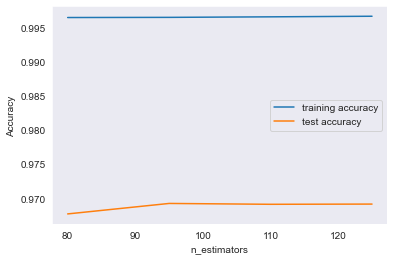

In [132]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [133]:
rf.best_params_

{'n_estimators': 95}

In [134]:
rf.best_score_

0.9692337288073702

In [135]:
rf_best=rf.best_estimator_
rf_best

RandomForestClassifier(max_depth=29, n_estimators=95)

## Tuning max_features¶
### Let's see how the model performance varies with max_features, which is the maximum numbre of features considered for splitting at a node.

In [136]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 15]}

# instantiate the model
rf = RandomForestClassifier(max_depth=29,n_estimators=95)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train_pca, y_train_smo)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=29, n_estimators=95),
             param_grid={'max_features': [4, 8, 15]}, return_train_score=True,
             scoring='accuracy')

In [137]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,14.953215,0.461735,0.149202,0.012256,4,{'max_features': 4},0.968985,0.967732,0.971021,0.971800,0.971800,0.970268,0.001633,1,0.996475,0.997024,0.997141,0.996828,0.996789,0.996851,0.000228
1,28.536573,1.991530,0.143198,0.015037,8,{'max_features': 8},0.970081,0.965226,0.967888,0.967883,0.971173,0.968450,0.002055,2,0.995770,0.996789,0.996632,0.996671,0.996789,0.996530,0.000385
2,51.776425,1.873945,0.145592,0.009932,15,{'max_features': 15},0.969925,0.965069,0.968358,0.967727,0.968667,0.967949,0.001608,3,0.995888,0.996475,0.995966,0.995810,0.996084,0.996045,0.000234


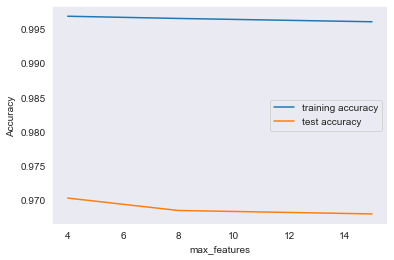

In [138]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [139]:
rf.best_params_

{'max_features': 4}

In [140]:
rf.best_score_

0.9702676566474938

In [141]:
rf_best=rf.best_estimator_
rf_best

RandomForestClassifier(max_depth=29, max_features=4, n_estimators=95)

# Tuning min_sample_leaf

The hyperparameter min_samples_leaf is the minimum number of samples required to be at a leaf node:

If int, then consider min_samples_leaf as the minimum number.
If float, then min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

In [142]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(1, 20, 5)}

# instantiate the model
rf = RandomForestClassifier(max_depth=29,n_estimators=95,max_features=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train_pca, y_train_smo)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=29, max_features=4,
                                              n_estimators=95),
             param_grid={'min_samples_leaf': range(1, 20, 5)},
             return_train_score=True, scoring='accuracy')

In [143]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,14.139308,0.828912,0.139325,0.005825,1,{'min_samples_leaf': 1},0.971648,0.966635,0.970551,0.971957,0.970547,0.970268,0.001903,1,0.996710,0.996828,0.997063,0.996867,0.996906,0.996875,0.000115
1,13.151512,0.588286,0.136418,0.012980,6,{'min_samples_leaf': 6},0.941103,0.947525,0.955044,0.957230,0.959267,0.952034,0.006756,2,0.986254,0.987781,0.988329,0.988291,0.987703,0.987672,0.000754
2,12.669774,0.622127,0.120675,0.005150,11,{'min_samples_leaf': 11},0.922932,0.934837,0.942669,0.942817,0.946107,0.937872,0.008339,3,0.972664,0.973839,0.974661,0.971882,0.975641,0.973737,0.001348
3,12.137723,0.173928,0.119204,0.005344,16,{'min_samples_leaf': 16},0.906172,0.927318,0.931078,0.932477,0.934357,0.926280,0.010316,4,0.960484,0.960210,0.961267,0.959585,0.958058,0.959921,0.001077


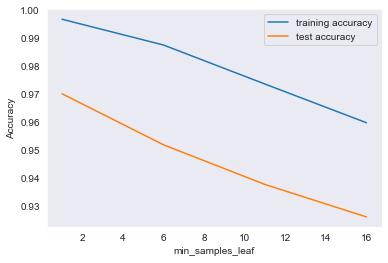

In [144]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [145]:
rf.best_score_

0.9702676222908831

In [146]:
rf.best_params_

{'min_samples_leaf': 1}

In [147]:
rf_best=rf.best_estimator_
rf_best

RandomForestClassifier(max_depth=29, max_features=4, n_estimators=95)

In [148]:
# we can now find the optimal hyperparameter
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(
                             
                             class_weight='balanced',
                             max_depth=29,
                             max_features=4,
                             n_estimators=95,
                            random_state=100
                             )

In [149]:
# fit
rf_pca=rfc.fit(X_train_pca,y_train_smo)
#Predict on training set
rtrain_predictions = rf_pca.predict(X_train_pca)
rtrain_predprob = rf_pca.predict_proba(X_train_pca)[:,1]

In [150]:
#lets print some scores
print ("Accuracy :",metrics.roc_auc_score(y_train_smo, rtrain_predictions))
print ("Recall/Sensitivity :",metrics.recall_score(y_train_smo, rtrain_predictions))
print ("AUC Score (Train):",metrics.roc_auc_score(y_train_smo, rtrain_predprob))

Accuracy : 0.9965849990600915
Recall/Sensitivity : 1.0
AUC Score (Train): 0.9998561504343004


In [151]:
#lets predict on test dataset
pred_probs_test = rf_pca.predict(X_test_pca)
confusion = metrics.confusion_matrix(y_test, pred_probs_test)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Roc_auc_score :",(metrics.roc_auc_score(y_test, pred_probs_test)))
print('precision score:',(metrics.precision_score(y_test, pred_probs_test)))
print('Sensitivity/Recall :',(TP / float(TP+FN)))
print('Specificity:',(TN / float(TN+FP)))
print('False Positive Rate:',(FP/ float(TN+FP)))
print('Positive predictive value:',(TP / float(TP+FP)))
print('Negative Predictive value:',(TN / float(TN+ FN)))
print("Accuracy :",(metrics.accuracy_score(y_test,pred_probs_test)))

Roc_auc_score : 0.732313565672151
precision score: 0.561122244488978
Sensitivity/Recall : 0.49645390070921985
Specificity: 0.9681732306350821
False Positive Rate: 0.03182676936491789
Positive predictive value: 0.561122244488978
Negative Predictive value: 0.9591131586524618
Accuracy : 0.9324378777703156


In [152]:
#lets check with probability cutoff 0.5
y_train_predrf = rf_pca.predict_proba(X_train_pca)[:,1]
y_train_predrf_final = pd.DataFrame({'Churn':y_train_smo, 'Churn_Prob':y_train_predrf})
y_train_predrf_final['Churn_Prob'] = y_train_predrf
y_train_predrf_final['predicted'] = y_train_predrf_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_predrf_final.head()

,Churn,Churn_Prob,predicted
0,0,0.164036,0
1,0,0.136240,0
2,0,0.034211,0
3,0,0.020678,0
4,0,0.044211,0


In [153]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_predrf_final[i]= y_train_predrf_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_predrf_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.164036,0,1,1,0,0,0,0,0,0,0,0
1,0,0.136240,0,1,1,0,0,0,0,0,0,0,0
2,0,0.034211,0,1,0,0,0,0,0,0,0,0,0
3,0,0.020678,0,1,0,0,0,0,0,0,0,0,0
4,0,0.044211,0,1,0,0,0,0,0,0,0,0,0


## we can see that Train Recall score of Random forest is better than Logistics Regression

# Conclusion

 - Average revenue per user seems to be most important feature in determining churn prediction.
 - Incoming and Outgoing Calls on romaing for 8th month are strong indicators of churn behaviour.
 - Local Outgoing calls made to landline , fixedline , mobile and call center provides a strong indicator of churn behaviour.
 - Better 2G/3G area coverage where 2G/3G services are not good, it's strong indicator of churn behaviour.

# Need to predict on unseen data

In [154]:
X_test_pca_unseen.shape

(30000, 80)

In [155]:
# evaluate predictions
y_pred_unseen = rf_pca.predict(X_test_pca_unseen)

In [156]:
y_pred_unseen.shape

(30000,)

In [157]:
y_pred_unseen

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [158]:
pd.DataFrame(y_pred_unseen)[0].value_counts()

0    29972
1       28
Name: 0, dtype: int64

In [159]:
final_result=pd.DataFrame({'id':id,'churn_probability':y_pred_unseen})
final_result

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0
...,...,...
29995,99994,0
29996,99995,0
29997,99996,0
29998,99997,0


In [160]:
final_result.to_csv('submission.csv',index=False)